### Data Cleaning and EDA

In [1]:
# imports
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize


In [2]:
# read in the data
soccer = pd.read_csv('./data/soccer.csv')

In [3]:
# Check the first 5 rows
soccer.head()

,subreddit,title,created_utc
0,soccer,Patrice Motsepe (head of CAF) statements after...,1673634624
1,soccer,"Since it hasn't been posted here, the statemen...",1673634572
2,soccer,[Brighton and Hove Albion] Facundo Buonanotte ...,1673634411
3,soccer,PSV see Dynamo Kyiv's Viktor Tsygankov as main...,1673634401
4,soccer,Brighton and Hove Albion offical: Facundo Buon...,1673634201


In [4]:
# read in the data 
world_cup = pd.read_csv('./data/world_cup.csv')

In [5]:
# Check the first 5 words
world_cup.head()

,subreddit,title,created_utc
0,worldcup,How do some football managers always get the b...,1673632813
1,worldcup,France and Argentina fans… so is it fair to co...,1673621651
2,worldcup,where to the final match ball 2022 with teams ...,1673601825
3,worldcup,Are You Looking For Machine Stitch Trousers In...,1673597142
4,worldcup,World Cup 2026 Preview: How will Brazil fair i...,1673593701


### Count Vectorizer for Soccer 

In [6]:
stops = stopwords.words('english')
cvec = CountVectorizer(stop_words = stops)

In [7]:
title_vect = cvec.fit_transform(soccer['title'])
s_title_vect_df = pd.DataFrame(title_vect.todense(), columns=cvec.get_feature_names_out())

# Take a look at the top 15 words
s_title_vect_df.sum().sort_values(ascending=False).head(15)

cup           77
sign          68
club          67
league        64
football      59
chelsea       59
match         56
united        56
manchester    55
player        52
loan          52
vs            49
thread        45
real          45
deal          43
dtype: int64

### Count Vectorizer for World Cup

In [8]:
title_vect2 = cvec.fit_transform(world_cup['title'])
w_title_vect_df = pd.DataFrame(title_vect2.todense(), columns=cvec.get_feature_names_out())

# Take a look at the top 15 words
w_title_vect_df.sum().sort_values(ascending=False).head(15)
# The 800 is an instance of nft spam 

world        385
cup          355
messi        139
first        115
people       111
2022         111
argentina     92
800           88
fifa          84
qatar         67
new           65
final         64
live          59
ronaldo       55
football      54
dtype: int64

In [9]:
strange_number = world_cup['title'].str.contains('800')
strange_number = ~strange_number

In [10]:
# Got rid of strange number 800 nft spam 
world_cup = world_cup.loc[strange_number]

In [11]:
type(strange_number)
print(strange_number)

0      True
1      True
2      True
3      True
4      True
       ... 
995    True
996    True
997    True
998    True
999    True
Name: title, Length: 1000, dtype: bool


In [12]:
# Combined soccer dataframe and world cup data frame
soccer_world_cup = pd.concat([soccer,world_cup], ignore_index=True)
soccer_world_cup.head()

,subreddit,title,created_utc
0,soccer,Patrice Motsepe (head of CAF) statements after...,1673634624
1,soccer,"Since it hasn't been posted here, the statemen...",1673634572
2,soccer,[Brighton and Hove Albion] Facundo Buonanotte ...,1673634411
3,soccer,PSV see Dynamo Kyiv's Viktor Tsygankov as main...,1673634401
4,soccer,Brighton and Hove Albion offical: Facundo Buon...,1673634201


### Showing the 800 spam is gone

In [13]:
# Fit and tranform world cup data
title_vect2 = cvec.fit_transform(world_cup['title'])
# Make dataframe out of title category
w_title_vect_df = pd.DataFrame(title_vect2.todense(), columns=cvec.get_feature_names_out())

# Take a look at the top 15 words
w_title_vect_df.sum().sort_values(ascending=False).head(15)

world        385
cup          355
messi        139
2022         111
argentina     92
fifa          84
first         71
qatar         67
people        67
final         64
ronaldo       55
football      54
france        53
name          53
service       47
dtype: int64

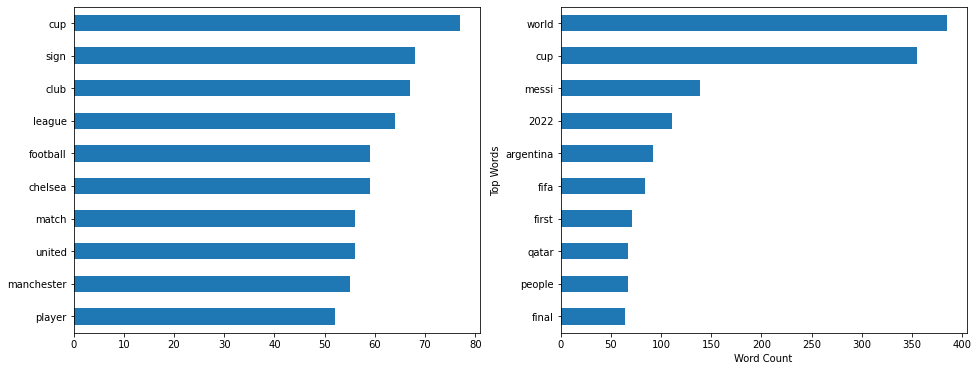

In [43]:
fig, ax = plt.subplots(1,2, figsize=(16,6))
s_title_vect_df.sum().sort_values(ascending=False).head(10).plot(kind='barh', ax=ax[0])
w_title_vect_df.sum().sort_values(ascending=False).head(10).plot(kind='barh', ax=ax[1])
plt.xlabel('Word Count')
plt.ylabel('Top Words')
ax[0].invert_yaxis()
ax[1].invert_yaxis();

### Word Count Barh Distribution Described
In both the soccer and world cup subreddits cup was a very commonly used word. Showed that many people who went into a subreddit to talk about the world cup went to both the soccer and world cup subreddits to talk about it. The location of the world cup qatar and the year 2022 showed up in the world cup subreddit but were not as popular in the soccer subreddit. The world cup subreddit had far hihger frequencies of the top 10 words than the soccer subreddit did.

### Soccer and World Cup Bigrams

In [39]:
cv = CountVectorizer(stop_words='english', ngram_range=(3,3))

soccer_vect = cv.fit_transform(soccer['title'])
soccer_vect_df = pd.DataFrame(soccer_vect.todense(), columns=cv.get_feature_names_out())

world_cup_vect = cv.fit_transform(world_cup['title'])
world_cup_vect_df = pd.DataFrame(world_cup_vect.todense(), columns=cv.get_feature_names_out())

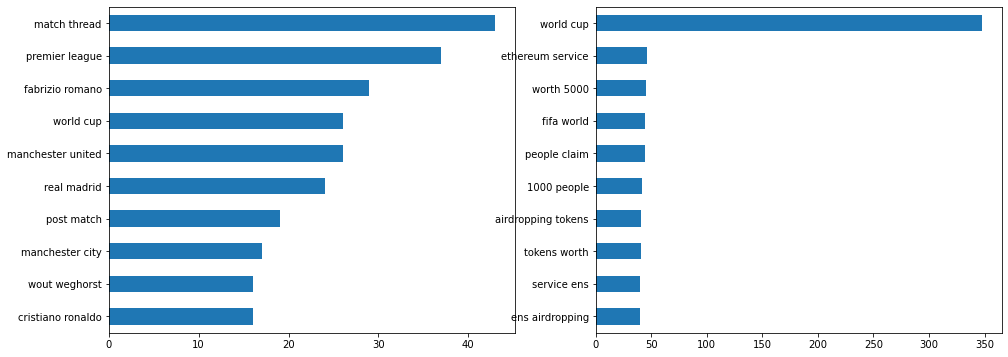

In [37]:
fig, ax = plt.subplots(1,2, figsize=(16,6))
soccer_vect_df.sum().sort_values(ascending=False).head(10).plot(kind='barh', ax=ax[0])
world_cup_vect_df.sum().sort_values(ascending=False).head(10).plot(kind='barh', ax=ax[1])

ax[0].invert_yaxis()
ax[1].invert_yaxis();

### Soccer and World Cup Bigrams Described
The world cup subreddit seems to have a moderator issue or troubles with cryptocurrency. The bigrams outside of world cup and fifa world mostly consist of ecoins, airdropping, and other services. Most likely people trying to take advantage of the many people on the world cup subreddit to promote their items. The soccer subreddit does not have this issue as the common words are of the world cup, soccer teams, jouurnalists, and popular league names. 

In [15]:
#world_cup.to_csv('data/world_cup_no_spam.csv', encoding = 'utf-8', index=False)

In [17]:
# Create a new column for the text length for Soccer_World_Cup
soccer_world_cup['length'] = soccer_world_cup['title'].apply(len)
soccer_world_cup.head()

,subreddit,title,created_utc,length
0,soccer,Patrice Motsepe (head of CAF) statements after...,1673634624,66
1,soccer,"Since it hasn't been posted here, the statemen...",1673634572,78
2,soccer,[Brighton and Hove Albion] Facundo Buonanotte ...,1673634411,65
3,soccer,PSV see Dynamo Kyiv's Viktor Tsygankov as main...,1673634401,154
4,soccer,Brighton and Hove Albion offical: Facundo Buon...,1673634201,72


In [18]:
# Create a new column for the word count for Soccer_World_Cup
soccer_world_cup['word_count'] = soccer_world_cup['title'].apply(lambda x: len(x.split()))

In [21]:
# Separate reddits by subreddit for comparison
socc = soccer_world_cup[soccer_world_cup['subreddit'] == 'soccer']
wcup = soccer_world_cup[soccer_world_cup['subreddit'] == 'worldcup']

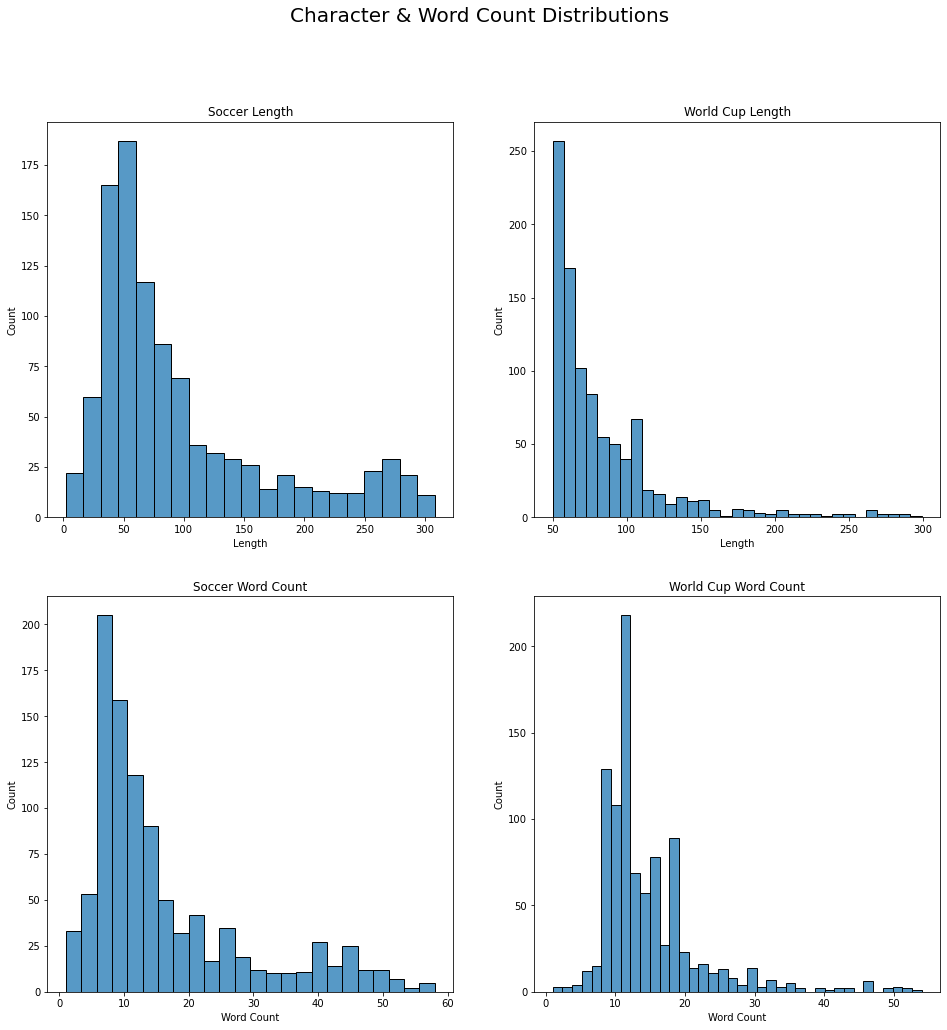

In [22]:
# Plot length and word count distributions by subreddit
fig, ax = plt.subplots(2, 2, figsize=(16,16))
sns.histplot(socc['length'], ax=ax[0,0])
sns.histplot(wcup['length'], ax=ax[0,1])
sns.histplot(socc['word_count'], ax=ax[1,0])
sns.histplot(wcup['word_count'], ax=ax[1,1])

ax[0,0].set(xlabel='Length', title='Soccer Length')
ax[0,1].set(xlabel='Length', title='World Cup Length')
ax[1,0].set(xlabel='Word Count', title='Soccer Word Count')
ax[1,1].set(xlabel='Word Count', title='World Cup Word Count')

fig.suptitle('Character & Word Count Distributions', fontsize=20);

### Character and Word Count Distributions Described
The soccer subreddit title word count had more high word counts in the range 40-60. The World Cup subreddit title word count however had much higher frequencies in the range form 10-20. The World Cup word count had a higher maximum word count than the soccer subreddit did. 

In [23]:
def my_lemmatizer(text):
    wnet = WordNetLemmatizer()
    return [wnet.lemmatize(w) for w in text.split(" ")]

In [24]:
wnet = WordNetLemmatizer()
lem_stopwords = [wnet.lemmatize(w) for w in stopwords.words('english')]

In [34]:
cv = CountVectorizer(
    stop_words=lem_stopwords,
    tokenizer=my_lemmatizer    
    )
soccer_world_cup_vect = cv.fit_transform(soccer_world_cup['title'])
soccer_world_cup_vect_df = pd.DataFrame(soccer_world_cup_vect.todense(), columns=cv.get_feature_names_out())

# Take a look at the top 20 words
soccer_world_cup_vect_df.sum().sort_values(ascending=False).head(20)

C:\Users\jerem\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


world        411
cup          371
-            322
messi        147
2022         108
first        105
player       102
fifa          99
club          93
match         91
team          87
football      86
|             79
sign          77
argentina     76
goal          72
v             72
final         64
people        64
get           63
dtype: int64

### Soccer World Cup Words described
The top 20 words for the combined dataframe consisted of the words world, cup, and messi. This makes sense as the world cup was the biggest event that recently occured in soccer. As well as Messi being the 3rd most popular word as he played a big role in his team Argentina winning the 2022 world cup. The special character symbols are logical as well as for longer titles these symbols are commonly used. 

In [26]:
soccer_world_cup

,subreddit,title,created_utc,length,word_count
0,soccer,Patrice Motsepe (head of CAF) statements after...,1673634624,66,10
1,soccer,"Since it hasn't been posted here, the statemen...",1673634572,78,13
2,soccer,[Brighton and Hove Albion] Facundo Buonanotte ...,1673634411,65,9
3,soccer,PSV see Dynamo Kyiv's Viktor Tsygankov as main...,1673634401,154,27
4,soccer,Brighton and Hove Albion offical: Facundo Buon...,1673634201,72,10
...,...,...,...,...,...
1951,worldcup,Did Enzo Fernandez deserve Young Player of the...,1671589663,57,9
1952,worldcup,What is the song at the beginning of this high...,1671589593,106,20
1953,worldcup,Need to find broadcast called by Pablo Giralt ...,1671588568,90,16
1954,worldcup,Where can I buy this shirt? I am super impress...,1671588429,69,13


### Conclusions for EDA

Both the world cup subreddit and soccer subreddit seem to have different enough words to justify keeping both subreddits. This way if someone wants to post about the world cup but not about league soccer they can go to the world cup subreddit. There is some overlap as evidenced through the words world and cup appearing in the top 3 for both subreddits but other than that there are not many similarities between the two in terms of word similarity. It would be reasonable to conclude that if the classification models can give an accuracy score of 80% or above then FIFA can still stand to make good profits from having them seperate. The problem however still stands that the soccer subreddit is moderated much better than the world cup subreddit. A decision to invest funding for moderators to dispel spam and irrelevant comments could get more people on that subreddit and increase viewrrship for the world cup. 